# lunapi tutorial

Links to notebooks in this repository: [Index](./00_overview.ipynb) | [Luna tutorial](./tutorial.ipynb) | 
[Individuals](./01_indivs.ipynb) | [Projects](./02_projects.ipynb) | [Staging](./03_staging.ipynb) | [Models](./04_models.ipynb) | [Advanced](./98_advanced.ipynb) | [Reference](./99_reference.ipynb)

---

This notebook steps through the original Luna [tutorial](https://zzz.bwh.harvard.edu/luna/tut/tut1/) using the Python-based `lunapi` instantiation of the Luna library.  Below we will follow, more or less step-by-step, each part to introduce a typical workflow using `lunapi`.   For further details on `lunapi` see the other [introductory and reference pages](./00_overview.ipynb) in this repository.  Even if you don't plan on using the command-line version of Luna, it is worth skimming those first three tutorial pages, as they give a little more context on the goals of the tutorial exercises. 

# Part 1

This part follows the steps described [here](https://zzz.bwh.harvard.edu/luna/tut/tut1/).  Rather than download the tutorial data as directed on that page, here we assume you are either using the Docker version of `lunapi`, or you've cloned the [luna-api-notebooks](https://github.com/remnrem/luna-api-notebooks) repository, both of which contain a folder `tutorial/` with all the necessary data and files. We also assume you are using Jupyterlab to open and interact with this notebook.

## Setting up a project

The first steps are to import the `lunapi` module and create a single, new project (always called `proj` by convention here):

In [1]:
import lunapi as lp

In [2]:
proj = lp.proj()

initiated lunapi v0.0.7 <lunapi.lunapi0.luna object at 0x127fd98b0> 



We'll then load the premade [_sample-list_](https://zzz.bwh.harvard.edu/luna/luna/args/#sample-lists) into this project, which is a plaintext file `s.lst` within the `tutorial/` folder:

In [3]:
proj.sample_list( 'tutorial/s.lst' )

read 3 individuals from tutorial/s.lst


This points to three individuals, each with an EDF and an XML annotation file containing prior staging information:

In [4]:
proj.sample_list()

,ID,EDF,Annotations
1,learn-nsrr01,tutorial/edfs/learn-nsrr01.edf,{tutorial/edfs/learn-nsrr01.xml}
2,learn-nsrr02,tutorial/edfs/learn-nsrr02.edf,{tutorial/edfs/learn-nsrr02.xml}
3,learn-nsrr03,tutorial/edfs/learn-nsrr03.edf,{tutorial/edfs/learn-nsrr03.xml}


## Displaying EDF files

The `desc()` function is a convenient way to get summary information on all individuals in a project (this is the equivalent of the Luna `DESC` command): 

In [5]:
proj.desc()

,ID,Gapped,Date,Start(hms),Stop(hms),Dur(hms),Dur(s),# sigs,# annots,Signals
1,learn-nsrr01,N,01.01.85,21.58.17,09.20.17,11:22:00,40920,14/14,10,SaO2[1] PR[1] EEG_sec[125] ECG[250] EMG[125] EOG_L[50] EOG_R[50] EEG[125] AIRFLOW[10] THOR_RES[10] ABDO_RES[10] POSITION[1] LIGHT[1] OX_STAT[1]
2,learn-nsrr02,N,01.01.85,21.18.06,07.15.36,09:57:30,35850,14/14,10,SaO2[1] PR[1] EEG_sec[125] ECG[250] EMG[125] EOG_L[50] EOG_R[50] EEG[125] AIRFLOW[10] THOR_RES[10] ABDO_RES[10] POSITION[1] LIGHT[1] OX_STAT[1]
3,learn-nsrr03,N,01.01.85,20.15.00,07.37.00,11:22:00,40920,14/14,10,SaO2[1] PR[1] EEG_sec[125] ECG[250] EMG[125] EOG_L[50] EOG_R[50] EEG[125] AIRFLOW[10] THOR_RES[10] ABDO_RES[10] POSITION[1] LIGHT[1] OX_STAT[1]


<div class="alert alert-block alert-info"><b>Note:</b> Note that whereas most Luna commands are evaluated via the `proc()` or `eval()` functions, this is a special case as the      Luna <tt>DESC</tt> command returns it output directy to the console (rather than Luna's formal output mechanism).  As such, we created the above wrapper.</div>
   
Next, we'll pull out the first individual from the project sample list, via the `inst()` function and assign this record to the variable `p` (by convention, we always label the primary individual under consideration as `p`):

In [6]:
p = proj.inst( 1 )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT


We can get a simple list of the channels, here returned as a Pandas dataframe (which naurally mirrors the information printed in the console/log above). This can be used programatically, e.g. saved as an object, etc.

In [7]:
p.channels()

,Channels
0,SaO2
1,PR
2,EEG_sec
3,ECG
4,EMG
5,EOG_L
6,EOG_R
7,EEG
8,AIRFLOW
9,THOR_RES


We can do likewise with any attached annotations by using `annots()` (in this case from the XML file):

In [8]:
p.annots()

,Annotations
0,Arousal
1,Hypopnea
2,N1
3,N2
4,N3
5,Obstructive_Apnea
6,R
7,SpO2_artifact
8,SpO2_desaturation
9,W


Below we'll see how to get more information on channels and annotations, using the `HEADERS` and `ANNOTS` commands respectively.

## Label remapping and sanitization

As discussed in the original tutorial, by default Luna will _sanitize_ signal and annotation labels, with the aim of making them easier to work with downstream, e.g. by removing spaces and special characters.   Thus, the annotation above `Obstructive_Apnea` is actually `Obstructive Apnea` in the original XML, but Luna has modified it when reading it in (all intra-string special characters are reduced to underscores).   

We can turn off this default behavior by setting the special variables `sanitize` and `keep-spaces` using the project-level `vars()` function.   See [this page](https://zzz.bwh.harvard.edu/luna/luna/args/) for details on the available options.  Here we supply a `dict` of option/value pairs: i.e. note the Python syntax of `{ 'key': value, 'key':value }`.

In [9]:
proj.vars( { 'sanitize':'F' , 'keep-spaces':'T' } )

Note that these particular options need to be set _before_ attaching an individual via `inst()`, as any mappings occur when first attaching a new individual instance.  Thus, as we've changed these options, we need to re-run the call to `inst()` to see any changes:

In [10]:
p = proj.inst( 1 ) 
p.channels()

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG(sec) | ECG | EMG | EOG(L) | EOG(R) | EEG
  AIRFLOW | THOR RES | ABDO RES | POSITION | LIGHT | OX STAT


,Channels
0,SaO2
1,PR
2,EEG(sec)
3,ECG
4,EMG
5,EOG(L)
6,EOG(R)
7,EEG
8,AIRFLOW
9,THOR RES


In [11]:
p.annots()

,Annotations
0,Arousal ()
1,Hypopnea
2,N1
3,N2
4,N3
5,Obstructive Apnea
6,R
7,SpO2 artifact
8,SpO2 desaturation
9,W


In [12]:
proj.desc()

,ID,Gapped,Date,Start(hms),Stop(hms),Dur(hms),Dur(s),# sigs,# annots,Signals
1,learn-nsrr01,N,01.01.85,21.58.17,09.20.17,11:22:00,40920,14/14,10,SaO2[1] PR[1] EEG(sec)[125] ECG[250] EMG[125] EOG(L)[50] EOG(R)[50] EEG[125] AIRFLOW[10] THOR RES[10] ABDO RES[10] POSITION[1] LIGHT[1] OX STAT[1]
2,learn-nsrr02,N,01.01.85,21.18.06,07.15.36,09:57:30,35850,14/14,10,SaO2[1] PR[1] EEG(sec)[125] ECG[250] EMG[125] EOG(L)[50] EOG(R)[50] EEG[125] AIRFLOW[10] THOR RES[10] ABDO RES[10] POSITION[1] LIGHT[1] OX STAT[1]
3,learn-nsrr03,N,01.01.85,20.15.00,07.37.00,11:22:00,40920,14/14,10,SaO2[1] PR[1] EEG(sec)[125] ECG[250] EMG[125] EOG(L)[50] EOG(R)[50] EEG[125] AIRFLOW[10] THOR RES[10] ABDO RES[10] POSITION[1] LIGHT[1] OX STAT[1]


We'll reset these options for the rest of this tutorial however, i.e. to keep Luna's default approach to adjusting labels:

In [13]:
proj.vars( { 'sanitize':'T' , 'keep-spaces':'F' } )

## Signal summary statistics

The next step of the tutorial involves calculating some simple signal summary statistics (e.g. mean, RMS, etc).  This introduces two key concepts:  

   * how to apply one or more [Luna commands](https://zzz.bwh.harvard.edu/luna/ref/) to one or more individuals
   * and how to work with the output mechanism to retrieve the results.

Here we start by looking at a single individual (the first person from the sample list, which we've already associated with the variable `p` above).  Any valid Luna script/commands (here `STATS`) can be passed via the `eval()` (or equivalently `proc()`) functions.   

In [14]:
p.eval( 'STATS' )

 ..................................................................
 CMD #1: STATS
   options: sig=*
 processing SaO2 ...
 processing PR ...
 processing EEG(sec) ...
 processing ECG ...
 processing EMG ...
 processing EOG(L) ...
 processing EOG(R) ...
 processing EEG ...
 processing AIRFLOW ...
 processing THOR RES ...
 processing ABDO RES ...
 processing POSITION ...
 processing LIGHT ...
 processing OX STAT ...


,Command,Strata
0,STATS,CH


The output above is the same as you'd see on the console if running command-line Luna.  The `eval()` function also returns a table (Pandas dataframe) that mirrors what the command-line `destrat` tool would report if querying the output generated here.  There is only a single table of results, which is _stratified_ by channel (`CH`).  That is, each variable (e.g. `RMS`) can have multiple values, each associated with a different channel.  

After running `eval()` or `proc()` for an individual, any output is stored in that individual's _result cache_ (but note, this is overwritten by each new call of `eval()` or `proc()`).   To see the tables in the cache at any time, you can explicitly call the `strata()` function:

In [15]:
p.strata()

,Command,Strata
0,STATS,CH


To extract a table of results (as a Pandas dataframe), you can use `table()`, passing it the command and strata labels, i.e. the values reported in the rows of `strata()`:

In [16]:
p.table( 'STATS' , 'CH' )

,ID,CH,KURT,MAX,MEAN,MIN,P01,P02,P05,P10,...,P60,P70,P80,P90,P95,P98,P99,RMS,SD,SKEW
0,learn-nsrr01,ABDO RES,5.26486,0.992157,0.021829,-1.0,-0.709804,-0.505882,-0.317647,-0.2,...,0.027451,0.05098,0.098039,0.262745,0.435294,0.662745,0.87451,0.235721,0.234708,0.334763
1,learn-nsrr01,AIRFLOW,20.490936,0.992157,0.066442,-1.0,-0.2,-0.129412,-0.066667,-0.027451,...,0.07451,0.090196,0.113725,0.160784,0.207843,0.278431,0.34902,0.121956,0.102268,0.138384
2,learn-nsrr01,ECG,13.984303,1.25,0.009396,-1.240196,-1.240196,-0.857843,-0.191176,-0.083333,...,0.02451,0.034314,0.034314,0.083333,0.210784,0.828431,1.25,0.266661,0.266495,-0.115245
3,learn-nsrr01,EEG,4.657487,125.0,-0.301199,-124.019608,-124.019608,-124.019608,-70.098039,-24.019608,...,2.45098,4.411765,8.333333,23.039216,72.058824,125.0,125.0,37.801351,37.800154,0.086212
4,learn-nsrr01,EEG(sec),4.703039,125.0,1.185578,-124.019608,-124.019608,-124.019608,-78.921569,-20.098039,...,3.431373,6.372549,10.294118,22.058824,78.921569,125.0,125.0,40.325406,40.307978,-0.068798
5,learn-nsrr01,EMG,2.562353,31.5,-6.855696,-31.252941,-31.252941,-31.252941,-31.252941,-31.252941,...,-4.076471,-3.335294,-2.594118,-0.370588,5.311765,31.5,31.5,13.970074,12.172199,0.033768
6,learn-nsrr01,EOG(L),1.926088,125.0,0.472551,-124.019608,-124.019608,-124.019608,-124.019608,-61.27451,...,2.45098,4.411765,8.333333,52.45098,125.0,125.0,125.0,54.461877,54.45984,-0.026404
7,learn-nsrr01,EOG(R),2.016313,125.0,0.321447,-124.019608,-124.019608,-124.019608,-124.019608,-56.372549,...,2.45098,4.411765,7.352941,46.568627,125.0,125.0,125.0,54.009293,54.00835,-0.024934
8,learn-nsrr01,LIGHT,360.359887,1.0,0.997263,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.998631,0.052246,-19.035055
9,learn-nsrr01,OX STAT,-0.063555,2.0,0.428886,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.926107,0.820821,1.391434


This displays the whole table: you can alternatively copy it to a Python object - here we'll typically use `t` to refer to the current result table under consideration.  You can naturally use the array of Python/Pandas functionality to manipulate those results: e.g. extratcing a sub-table of the mean for just three channels:

In [17]:
t = p.table( 'STATS' , 'CH' )
t.query( "CH in ['SaO2','ECG','EMG']")[ ['CH','MEAN'] ]

,CH,MEAN
2,ECG,0.009396
5,EMG,-6.855696
12,SaO2,76.924249


The `lunapi` module also provides a simple wrapper function `lp.subset()` to subset table rows i) by individual or ii) by the values of factors and/or other variables, as well as iii) subsetting columns to particular variables. Here are some (unrealistic) examples (designed simply to show the syntax):

In [18]:
lp.subset( t , vars = [ 'CH' , 'RMS' ] , qry = " RMS > 50" )

,ID,CH,RMS
6,learn-nsrr01,EOG(L),54.461877
7,learn-nsrr01,EOG(R),54.009293
11,learn-nsrr01,PR,64.952329
12,learn-nsrr01,SaO2,85.566543


In [19]:
lp.subset( t , qry = " CH == 'PR' " )

,ID,CH,KURT,MAX,MEAN,MIN,P01,P02,P05,P10,...,P60,P70,P80,P90,P95,P98,P99,RMS,SD,SKEW
11,learn-nsrr01,PR,2.311002,200.0,57.348522,0.201419,0.201419,0.201419,0.201419,0.201419,...,68.36347,70.316625,72.26978,75.199512,79.301137,89.262226,147.261769,64.952329,30.495489,-0.457502


In [20]:
# using f-string query to pull a list of channels
chs = [ 'PR', 'POSITION' ] 
lp.subset( t , vars = [ 'CH' , 'MEAN' , 'RMS' ] , qry = f"CH in {chs}" )

,ID,CH,MEAN,RMS
10,learn-nsrr01,POSITION,1.654423,1.915741
11,learn-nsrr01,PR,57.348522,64.952329


## Working with annotations

Next, the tutorial considers working with associated annotation data.   We can get a summary of each annotation _class_ by the `ANNOTS` command, as described [here](https://zzz.bwh.harvard.edu/luna/ref/annotations/#annots).   Note that here we are applying `proc()` to the entire sample list (`proj`) rather than a single individual.  This means the Luna commands will be evaluated for all three individuals in the sample list sequentially:

<div class="alert alert-block alert-info"><b>Note:</b> This particular analysis runs quickly, but note that for non-trivial samples and analyses, this could take some time.  Also, currently the Python version of Luna does not show output until the entire job is complete.   It is therefore advisable to test scripts on one or two individuals first, before running on a larger set.    Alternatively, the command-line version of Luna is in some ways better suitable to dealing with large (e.g. 1000s of records), especially when combined with a compute cluster.  In any case, in the future we'll add better support for e.g. progress reports, and for better ability to manually halt long-running jobs.</div>


In [21]:
res = proj.proc( 'ANNOTS' )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT
 ..................................................................
 CMD #1: ANNOTS
   options: sig=*
  set epochs to default 30 seconds, 1364 epochs
  keeping annotations based on any overlap with an unmasked region
___________________________________________________________________
Processing: learn-nsrr02 | tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT
 ................................................

Note that here we use `proc()` instead of `eval()`.  When working at the project level (i.e. `proc.proc()`), Luna commands can only be evaluated with `proc()`.  When working at the individual level (i.e. `p.proc()`), then these commands are basically interchangeable, with the exception that `p.proc()` returns the results (i.e. here stored in `res`) as well as caching them internally, whereas `p.eval()` only returns the `strata()` summary table.  

In any case, here we need to call `proj.strata()` explicitly to see what was generated:

In [22]:
proj.strata()

,Command,Strata
0,ANNOTS,ANNOT
1,ANNOTS,ANNOT_INST
2,ANNOTS,ANNOT_INST_T1_T2


We'll pull the count and duration (totial seconds spanned) of each annotation class - noting that we get output for all three individuals:

In [23]:
proj.table( 'ANNOTS' , 'ANNOT' )

,ID,ANNOT,COUNT,DUR
0,learn-nsrr01,Arousal,194,1713.5
1,learn-nsrr02,Arousal,51,644.8
2,learn-nsrr03,Arousal,282,4002.4
3,learn-nsrr03,Central_Apnea,1,12.3
4,learn-nsrr01,Hypopnea,361,7012.6
5,learn-nsrr02,Hypopnea,101,1536.9
6,learn-nsrr03,Hypopnea,181,3215.2
7,learn-nsrr01,N1,109,3270.0
8,learn-nsrr02,N1,11,330.0
9,learn-nsrr03,N1,52,1560.0


As above, we can subset this table to pull out quantities of intersest.  To mirror the original tutorial, we want the count of obstructive apnea annotations per person:

In [24]:
t = proj.table( 'ANNOTS' , 'ANNOT' )
lp.subset( t , vars = ['ANNOT','COUNT'] , qry = " ANNOT == 'Obstructive_Apnea' " )

,ID,ANNOT,COUNT
16,learn-nsrr01,Obstructive_Apnea,37
17,learn-nsrr02,Obstructive_Apnea,5
18,learn-nsrr03,Obstructive_Apnea,163


Happily, this gives the same results as the original tutorial.   

The next step was to extract only REM-specific event counts.  This will involve re-running the `ANNOTS` command but also including a [`MASK`](https://zzz.bwh.harvard.edu/luna/ref/masks) to first restrict to REM (stage annotation `R`) events:

In [25]:
res = proj.proc( 'MASK ifnot=R & ANNOTS' )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT
 ..................................................................
 CMD #1: MASK
   options: ifnot=R sig=*
  set epochs, to default length 30, 1364 epochs
  set masking mode to 'force'
  annots: R
  applied annotation mask for 1 annotation(s)
  238 epochs match; 1126 newly masked, 0 unmasked, 238 unchanged
  total of 238 of 1364 retained
 ..................................................................
 CMD #2: ANNOTS
   options: sig=*
  keeping annotations based on any overlap with an unmasked region
___________________________________________________________________
Processing: learn-nsrr02 | tutorial/edfs/learn-nsrr02.e

Re-extracting the same metrics from the output, we again get similar results as the tutorial.  Note that the thrird individual does not have any scored REM sleep, and so there is no value for that individual.

In [26]:
t = proj.table( 'ANNOTS' , 'ANNOT' )
lp.subset( t , vars = ['ANNOT','COUNT'] , qry = " ANNOT == 'Obstructive_Apnea' " )

,ID,ANNOT,COUNT
4,learn-nsrr01,Obstructive_Apnea,27
5,learn-nsrr02,Obstructive_Apnea,3


## Putting it together

Having run one or two Luna commands and looked at some output, we can now move to more involved Luna scripts.  Here we also use a _variable_ in the script. This allows for different individuals in the sample-list or different runs of the same script to implement slight modifications, e.g. looking at different channels, or different sleep stages.  This script is stored in the file `first.txt`: the `lp.cmdfile()` utility reads this in, and does any necessary pre-processing ( e.g. removing comments, etc) and returns a string that can be fed into `proc()` or `eval()`:

In [27]:
lp.cmdfile( 'tutorial/cmd/first.txt' )

'EPOCH len=30 & TAG tag=STAGE/${stage} & MASK ifnot=${stage} & RESTRUCTURE & STATS sig=EEG'

This script defines 30-second epochs, sets an output `TAG` to keep track of the sleep stage (which here is defined by the variable `${stage}` [note - this could be any valid variable name, e.g. `${s}`, etc]. It then removes all other epochs for other stages, internally restructures the data, then generates signal statistics for a single channel `EEG`.  In order to avoid Luna complaining that the `${stage}` variable has not been defined, we first need to define it.  When using the command-line version, this would be passed in as a command-line option: e.g. something like this to define `${stage}`:

For a single stage, we can achieve the same result by using `proj.vars()` [or equivalently, `proj.var()`].  (We'll also use this to set `sig` to `EEG` so that only this channel is loaded in, as only that signal is used - this approach can speed things up in very large samples):

In [28]:
proj.var( { 'stage': 'N1', 'sig': 'EEG' } )

We'll then use `proj.proc()` to run this script: Luna will swap out instances of `${stage}` with the text `N1` before running the commands:

In [29]:
res = proj.proc( lp.cmdfile( 'tutorial/cmd/first.txt' ) )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 1 (of 14) selected in a standard EDF file
  EEG
 ..................................................................
 CMD #1: EPOCH
   options: len=30 sig=*
  set epochs, length 30 (step 30, offset 0), 1364 epochs
 ..................................................................
 CMD #2: TAG
   options: sig=* tag=STAGE/N1
  setting analysis tag to [STAGE/N1]
 ..................................................................
 CMD #3: MASK
   options: ifnot=N1 sig=*
  set masking mode to 'force'
  annots: N1
  applied annotation mask for 1 annotation(s)
  109 epochs match; 1255 newly masked, 0 unmasked, 109 unchanged
  total of 109 of 1364 retained
 ..................................................................
 CMD #4: RESTRUCTURE
   options: sig=*
  restructuring as an EDF+:  

Looking at the table of results with `strata()` - of particular interest is the output of the `STATS` command, which is stratified by channel (`CH`) but now also by sleep stage (`STAGE`) as a consequence of the `TAG` command:

In [30]:
proj.strata()

,Command,Strata
0,EPOCH,BL
1,EPOCH,STAGE
2,MASK,EMASK_STAGE
3,RESTRUCTURE,STAGE
4,STATS,CH_STAGE


We can review all outputs (stored in `res`) with `lp.show()`. (Note that in real contexts, these tables could become very large, and so `lp.show()` would not be the preferred way to extract results.)

In [31]:
lp.show( res )

EPOCH: BL


,ID,DUR,FIXED_DUR,GENERIC,INC,NE,OFFSET,TOT_DUR,TOT_PCT,TOT_REC,TOT_SPANNED,TOT_UNSPANNED
0,learn-nsrr01,30.0,30,0,30.0,1364,0.0,40920.0,1.0,40920.0,40920.0,0.0


EPOCH: STAGE


,ID,STAGE,DUR,FIXED_DUR,GENERIC,INC,NE,OFFSET,TOT_DUR,TOT_PCT,TOT_REC,TOT_SPANNED,TOT_UNSPANNED
0,learn-nsrr02,N1,30.0,30,0,30.0,1195,0.0,35850.0,1.0,35850.0,35850.0,0.0
1,learn-nsrr03,N1,30.0,30,0,30.0,1364,0.0,40920.0,1.0,40920.0,40920.0,0.0


MASK: EMASK_STAGE


,ID,EMASK,STAGE,MASK_MODE,MATCH_LOGIC,MATCH_TYPE,N_MASK_SET,N_MASK_UNSET,N_MATCHES,N_RETAINED,N_TOTAL,N_UNCHANGED
0,learn-nsrr01,N1,N1,force,OR,ifnot,1255,0,109,109,1364,109
1,learn-nsrr02,N1,N1,force,OR,ifnot,1184,0,11,11,1195,11
2,learn-nsrr03,N1,N1,force,OR,ifnot,1312,0,52,52,1364,52


RESTRUCTURE: STAGE


,ID,STAGE,DUR1,DUR2,NA,NR1,NR2,NS
0,learn-nsrr01,N1,40920.0,3270.0,1,40920,3270,1
1,learn-nsrr02,N1,35850.0,330.0,1,35850,330,1
2,learn-nsrr03,N1,40920.0,1560.0,1,40920,1560,1


STATS: CH_STAGE


,ID,CH,STAGE,KURT,MAX,MEAN,MIN,P01,P02,P05,...,P60,P70,P80,P90,P95,P98,P99,RMS,SD,SKEW
0,learn-nsrr01,EEG,N1,1.770623,59.313725,-0.295451,-81.862745,-18.137255,-16.176471,-12.254902,...,1.470588,3.431373,5.392157,8.333333,11.27451,15.196078,18.137255,7.354944,7.349016,0.015138
1,learn-nsrr02,EEG,N1,1.976144,49.509804,0.007178,-72.058824,-28.921569,-23.039216,-17.156863,...,2.45098,5.392157,8.333333,12.254902,16.176471,20.098039,24.019608,10.361542,10.361666,-0.487783
2,learn-nsrr03,EEG,N1,37.534412,125.0,0.198371,-124.019608,-25.980392,-20.098039,-14.215686,...,2.45098,4.411765,7.352941,11.27451,14.215686,20.098039,26.960784,12.302106,12.300538,-0.461329


Alternatively, we can extract only a particular table of interest:

In [32]:
proj.table('STATS','CH_STAGE')

,ID,CH,STAGE,KURT,MAX,MEAN,MIN,P01,P02,P05,...,P60,P70,P80,P90,P95,P98,P99,RMS,SD,SKEW
0,learn-nsrr01,EEG,N1,1.770623,59.313725,-0.295451,-81.862745,-18.137255,-16.176471,-12.254902,...,1.470588,3.431373,5.392157,8.333333,11.27451,15.196078,18.137255,7.354944,7.349016,0.015138
1,learn-nsrr02,EEG,N1,1.976144,49.509804,0.007178,-72.058824,-28.921569,-23.039216,-17.156863,...,2.45098,5.392157,8.333333,12.254902,16.176471,20.098039,24.019608,10.361542,10.361666,-0.487783
2,learn-nsrr03,EEG,N1,37.534412,125.0,0.198371,-124.019608,-25.980392,-20.098039,-14.215686,...,2.45098,4.411765,7.352941,11.27451,14.215686,20.098039,26.960784,12.302106,12.300538,-0.461329


Next, we'll set up a simple Python loop to run this script on all individuals, once for each sleep stage of N1, N2, N3 and REM.  We'll store the output of each `proc()` in a Python dictionary called `res`.  To reduce the clutter to the screen, we'll use `silent_proc()` instead of `proc()` - this is indentical except for the console output produced.   (In general, only use this when you are sure a command will run as expected.)

In [33]:
res = { } 
stages = [ 'N1', 'N2', 'N3', 'R' ]
for stage in stages:
    print( "processing stage " , stage )
    proj.var( 'stage', stage )
    res[ stage ] = proj.silent_proc( lp.cmdfile( 'tutorial/cmd/first.txt' ) )

processing stage  N1
processing stage  N2
processing stage  N3
processing stage  R


We can then pull out the results for particular stages: e.g. here directly accessing the tables in `res`:

In [34]:
res.keys()

dict_keys(['N1', 'N2', 'N3', 'R'])

In [35]:
res[ 'N1' ].keys()

dict_keys(['EPOCH: BL', 'EPOCH: STAGE', 'MASK: EMASK_STAGE', 'RESTRUCTURE: STAGE', 'STATS: CH_STAGE'])

In [36]:
res[ 'N1' ][ 'STATS: CH_STAGE' ]

,ID,CH,STAGE,KURT,MAX,MEAN,MIN,P01,P02,P05,...,P60,P70,P80,P90,P95,P98,P99,RMS,SD,SKEW
0,learn-nsrr01,EEG,N1,1.770623,59.313725,-0.295451,-81.862745,-18.137255,-16.176471,-12.254902,...,1.470588,3.431373,5.392157,8.333333,11.27451,15.196078,18.137255,7.354944,7.349016,0.015138
1,learn-nsrr02,EEG,N1,1.976144,49.509804,0.007178,-72.058824,-28.921569,-23.039216,-17.156863,...,2.45098,5.392157,8.333333,12.254902,16.176471,20.098039,24.019608,10.361542,10.361666,-0.487783
2,learn-nsrr03,EEG,N1,37.534412,125.0,0.198371,-124.019608,-25.980392,-20.098039,-14.215686,...,2.45098,4.411765,7.352941,11.27451,14.215686,20.098039,26.960784,12.302106,12.300538,-0.461329


In [37]:
res[ 'N2' ][ 'STATS: CH_STAGE' ]

,ID,CH,STAGE,KURT,MAX,MEAN,MIN,P01,P02,P05,...,P60,P70,P80,P90,P95,P98,P99,RMS,SD,SKEW
0,learn-nsrr01,EEG,N2,2.935892,125.0,-0.313127,-124.019608,-27.941176,-23.039216,-17.156863,...,1.470588,4.411765,7.352941,12.254902,17.156863,23.039216,27.941176,10.646079,10.641475,0.070573
1,learn-nsrr02,EEG,N2,6.550833,125.0,-0.134945,-124.019608,-40.686275,-32.843137,-23.039216,...,3.431373,6.372549,10.294118,16.176471,22.058824,28.921569,34.803922,14.74242,14.741807,-0.196103
2,learn-nsrr03,EEG,N2,20.749735,125.0,0.126607,-124.019608,-37.745098,-27.941176,-19.117647,...,2.45098,5.392157,8.333333,13.235294,19.117647,26.960784,35.784314,14.496728,14.49618,-0.402057


When the output is in this format (i.e. split across conditions/stages), it is often convenient to pull the similar tables together for analysis, etc.  For example, if we want one table with all individuals and all stages, we can use built-in Pandas options, such as `concat()`:  

In [38]:
import pandas as pd
pd.concat( [ res[ stage ][ 'STATS: CH_STAGE' ][ ['ID','STAGE','MEAN'] ] for stage in stages ] )

,ID,STAGE,MEAN
0,learn-nsrr01,N1,-0.295451
1,learn-nsrr02,N1,0.007178
2,learn-nsrr03,N1,0.198371
0,learn-nsrr01,N2,-0.313127
1,learn-nsrr02,N2,-0.134945
2,learn-nsrr03,N2,0.126607
0,learn-nsrr01,N3,-0.454933
1,learn-nsrr02,N3,-0.130732
2,learn-nsrr03,N3,0.171914
0,learn-nsrr01,R,-0.371502


Alternatively, `lunapi` has a simple wrapper function to do this (assuming the same type of structure of nested-dictionaries in the output).  It can also add an index to reflect the higher-level (here sleep stage, which is also present in the original tables, but this can be useful if it isn't).  This takes all tables with the key `RESTRUCTURE: STAGE` from `res` and concatenates them, adding an index `IDX` based on `res.keys()` (i.e. in this example, sleep stages):

In [39]:
lp.concat( res , 'RESTRUCTURE: STAGE'  , add_index = 'IDX' )

,ID,STAGE,DUR1,DUR2,NA,NR1,NR2,NS,IDX
0,learn-nsrr01,N1,40920.0,3270.0,1,40920,3270,1,N1
1,learn-nsrr02,N1,35850.0,330.0,1,35850,330,1,N1
2,learn-nsrr03,N1,40920.0,1560.0,1,40920,1560,1,N1
3,learn-nsrr01,N2,40920.0,15690.0,1,40920,15690,1,N2
4,learn-nsrr02,N2,35850.0,11970.0,1,35850,11970,1,N2
5,learn-nsrr03,N2,40920.0,11250.0,1,40920,11250,1,N2
6,learn-nsrr01,N3,40920.0,510.0,1,40920,510,1,N3
7,learn-nsrr02,N3,35850.0,5550.0,1,35850,5550,1,N3
8,learn-nsrr03,N3,40920.0,630.0,1,40920,630,1,N3
9,learn-nsrr01,R,40920.0,7140.0,1,40920,7140,1,R


## Using data freezes

Alternatively, rather than using Python loops to produce results for different stages, we could have (in this particular scenario) achieved the same goals by using Luna's [freeze/thaw](https://zzz.bwh.harvard.edu/luna/ref/freezes) mechanism to derive the various sub-analyses from a single run for each individual, as shown in the script `tutorial/cmd/first-freezes.txt`:

In [40]:
%%sh
cat tutorial/cmd/first-freezes.txt

EPOCH len=30

FREEZE F1
TAG tag=STAGE/N1
MASK ifnot=N1
RE
STATS sig=EEG

THAW F1
TAG tag=STAGE/N2
MASK ifnot=N2
RE
STATS sig=EEG

THAW F1
TAG tag=STAGE/N3
MASK ifnot=N3
RE
STATS sig=EEG

THAW F1
TAG tag=STAGE/R
MASK ifnot=R
RE
STATS sig=EEG


In [41]:
res = proj.proc( lp.cmdfile( 'tutorial/cmd/first-freezes.txt' ) )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 1 (of 14) selected in a standard EDF file
  EEG
 ..................................................................
 CMD #1: EPOCH
   options: len=30 sig=*
  set epochs, length 30 (step 30, offset 0), 1364 epochs
 ..................................................................
 CMD #2: FREEZE
   options: F1 sig=*
  freezing state, with tag F1
  copied 40920 records
  currently 1 freeze(s): F1
 ..................................................................
 CMD #3: TAG
   options: sig=* tag=STAGE/N1
  setting analysis tag to [STAGE/N1]
 ..................................................................
 CMD #4: MASK
   options: ifnot=N1 sig=*
  set masking mode to 'force'
  annots: N1
  applied annotation mask for 1 annotation(s)
  109 epochs match; 1255 newly masked, 0 unmask

Here we used `proc()` instead of `silent_proc()` as above, so we've got a lot of output.  Note that final message about skipping the `STATS` command: this is fine -- recall that there were truly no REM records for this third individual.  

Looking at the cached outputs (i.e. this contains the same information as in `res`):

In [42]:
proj.strata()

,Command,Strata
0,EPOCH,BL
1,EPOCH,STAGE
2,MASK,EMASK_STAGE
3,RE,STAGE
4,STATS,CH_STAGE


We can extract the same table of RMS values by sleep stage, getting the same answers as in the original tutorial:

In [43]:
proj.table( 'STATS' , 'CH_STAGE' )[ ['ID','STAGE','RMS' ] ] 

,ID,STAGE,RMS
0,learn-nsrr01,N1,7.354944
1,learn-nsrr02,N1,10.361542
2,learn-nsrr03,N1,12.302106
3,learn-nsrr01,N2,10.646079
4,learn-nsrr02,N2,14.74242
5,learn-nsrr03,N2,14.496728
6,learn-nsrr01,N3,13.014505
7,learn-nsrr02,N3,20.054659
8,learn-nsrr03,N3,18.980088
9,learn-nsrr01,R,7.563595


We can get a slightly more convenient format of output with `pd.pivot()`:

In [44]:
t = proj.table( 'STATS' , 'CH_STAGE' )
pd.pivot( t , index = 'ID' , columns = 'STAGE' , values='RMS' )

STAGE,N1,N2,N3,R
ID,,,,
learn-nsrr01,7.354944,10.646079,13.014505,7.563595
learn-nsrr02,10.361542,14.74242,20.054659,14.146456
learn-nsrr03,12.302106,14.496728,18.980088,NaN


# Part 2

## General syntax notes

We've seen how to apply Luna commands (via `proc()` at the project-level, or either `proc()` or `eval()` at the instance-level), as well as setting variables/options via `proj.var()` and working with output via `strata()`, `table()`, `lp.show()` and other utilties.  

To restate some of the equivalences here, first __when working with a single individual__ (e.g. `learn-nsrr02`).  Consider if this is the command-line Luna script, to get RMS per channel: 

```
luna s.lst id=learn-nsrr02 a=1 b=xyz @param.txt -o out.db -s HEADERS 

destrat out.db +HEADERS -r CH
```
(Note that we set a variables `${a}` and `${b}` and include other information from a [_parameter-file_](https:/zzz.bwh.harvard.edu/luna/luna/args/#parameter-files) - these are not used in the command, but just included here to show the corresponding syntax for these things in `lunapi`).   In `lunapi`, we'd do the following steps (assuming `proj = lp.proj()` has already been called):

```
proj.sample_list( 's.lst' )
proj.var( { 'a': 1 , 'b': 'xyz' } )     # n.b. using dict as an inputs to specify >1 variable at once
proj.include( 'param.txt' )
p = proj.inst( 'learn-nsrr02' )         # n.b. using ID-string instead of a row number (2 in this case)
p.eval( 'HEADERS' )
p.table( 'HEADERS' , 'CH' )
```

Second, __when working at the project/sample-list level__, the original Luna command may look very similar (simply dropping the `id`):

```
luna s.lst a=1 b=xyz @param.txt -o out.db -s HEADERS 

destrat out.db +HEADERS -r CH
```

When using `lunapi`, we'd achieve similar results as follows:

```
proj.sample_list( 's.lst' )
proj.var( { 'a': 1 , 'b': 'xyz' } )
proj.include( 'param.txt' )
proj.proc( 'HEADERS' )                  # i.e. call to proj.proc() rather than p.eval()
proj.table( 'HEADERS' , 'CH' )          # i.e. a call to proj.table() rather than p.table()
```


Please see the [reference](./99_reference.ipynb) pages for more details.

## Parameter files

In the above example, we introduced a new function: `include()`, which simply reads tab-separated key/value pairs from a text file and assigns those variables those values (using `proj.vars()`). The `vars.txt` file is as follows:

In [45]:
%%sh
cat tutorial/cmd/vars.txt

alias	EEG1|EEG
alias	EEG2|EEG(sec)
alias	OXSTAT|"OX STAT"
eeg	EEG1,EEG2
myepoch	10
nrem	N1,N2,N3


We can include these defintions as follows - i.e. equivalent to running `proj.vars( 'myepoch' , 10 )` etc.  The `include()` function returns the number of variables successfully set:

In [46]:
proj.include( 'tutorial/cmd/vars.txt' )

  setting alias = EEG1|EEG
  setting alias = EEG2|EEG(sec)
  setting alias = OXSTAT|"OX STAT"
  setting eeg = EEG1,EEG2
  setting myepoch = 10
  setting nrem = N1,N2,N3


6

We can review _all_ attached project-level variables using `proj.vars()` - note that as well as the variables specified explicitly above, this will include any pre-defined variables that Luna uses internally (i.e. here, the grouping of EEG variables) - these internal variables can be ignored (or changed) as desired):

In [47]:
proj.vars()

{'alias': 'OXSTAT|"OX STAT"',
 'anterio-frontal': 'AF7,AF3,AFZ,AF8,AF4',
 'anterior': 'FP1,AF7,AF3,F1,F3,F5,F7,FPZ,AFZ,FZ,FP2,AF8,AF4,F2,F4,F6,F8',
 'central': 'FT7,FC5,FC3,FC1,C1,C3,C5,T7,TP7,CP5,CP3,CP1,CPZ,FCZ,CZ,FT8,FC6,FC4,FC2,C2,C4,C6,T8,TP8,CP6,CP4,CP2',
 'centro-parietal': 'CP5,CP3,CP1,CPZ,CP6,CP4,CP2',
 'eeg': 'EEG1,EEG2',
 'frontal': 'F1,F3,F5,F7,FZ,F2,F4,F6,F8',
 'fronto-central': 'FC5,FC3,FC1,FCZ,FC6,FC4,FC2',
 'keep-spaces': 'F',
 'left': 'FP1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,FC3,FC1,C1,C3,C5,T7,TP7,CP5,CP3,CP1,P1,P3,P5,P7,P9,PO7,PO3,O1',
 'mid-central': 'C1,C3,C5,CZ,C2,C4,C6',
 'midline': 'IZ,OZ,POZ,PZ,CPZ,FPZ,AFZ,FZ,FCZ,CZ',
 'myepoch': '10',
 'nrem': 'N1,N2,N3',
 'occiptital': 'O1,IZ,OZ,O2',
 'parietal': 'P1,P3,P5,P7,P9,PZ,P2,P4,P6,P8,P10',
 'parieto-occipital': 'PO7,PO3,POZ,PO8,PO4',
 'posterior': 'P1,P3,P5,P7,P9,PO7,PO3,O1,IZ,OZ,POZ,PZ,P2,P4,P6,P8,P10,PO8,PO4,O2',
 'pre-frontal': 'FP1,FPZ,FP2',
 'right': 'FP2,AF8,AF4,F2,F4,F6,F8,FT8,FC6,FC4,FC2,C2,C4,C6,T8,TP8,CP6,CP4,CP2,

With these variable set, we can now run the `second.txt` script to mirror the original tutorial, which ran this for the first individual:

Here is the script:

In [48]:
lp.cmdfile( 'tutorial/cmd/second.txt' )

'EPOCH len=${myepoch} & MASK all & MASK unmask-if=${nrem} & RESTRUCTURE & STATS sig=${eeg}'

And running this for the first individual:

In [49]:
p = proj.inst( 'learn-nsrr01' )
p.eval( lp.cmdfile( 'tutorial/cmd/second.txt' ) )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 1 (of 14) selected in a standard EDF file
  EEG1
 ..................................................................
 CMD #1: EPOCH
   options: len=10 sig=*
  set epochs, length 10 (step 10, offset 0), 4092 epochs
 ..................................................................
 CMD #2: MASK
   options: all sig=*
  set masking mode to 'mask' (default)
  reset all 4092 epochs to be masked
 ..................................................................
 CMD #3: MASK
   options: sig=* unmask-if=N1,N2,N3
  set masking mode to 'unmask'
  annots: N1 N2 N3
  applied annotation mask for 3 annotation(s) (using or-matching across multiple annotations)
  1947 epochs match; 0 newly masked, 1947 unmasked, 2145 unchanged
  total of 1947 of 4092 retained
 ...................................

,Command,Strata
0,EPOCH,BL
1,MASK,EMASK
2,RESTRUCTURE,BL
3,STATS,CH


The above output now contains the NREM (N1,N2 and N3) values for two EEG channels for the basic stats, defined on 10-second epochs:

In [50]:
p.table( 'STATS' , 'CH' )[ ['ID','CH','RMS'] ]

,ID,CH,RMS
0,learn-nsrr01,EEG1,10.239962


# Part 3

In this final section of the tutorial, we'll use Luna to calculate some typical metrics of interest for sleep studies, including:

   * how basic statistics vary across the night
   * measures of sleep macro-architecture
   * filtering and artifact detection in the EEG
   * spectral analysis using fast Fourier transforms
   * spindle detection using wavelets


## Epoch-level summaries

Returning to the `STATS` command described above, here we use it with the epoch option, in order to generate per-epoch statistics for the second individual in the sample-list.  Because we previosuly set `sig` to only load EEGs, we want to clear it now (i.e. otherwise the EMG and ECG signals will not be available).   That is - project-level options persist across different calls to `proc()` etc, and so be careful to keep them in track.

In [51]:
proj.var( 'sig' )

'EEG'

In [52]:
proj.var( 'sig', '') 

In [53]:
p = proj.inst( 2 )
p.eval( 'EPOCH & STATS sig=EMG,ECG epoch' )

___________________________________________________________________
Processing: learn-nsrr02 | tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG2 | ECG | EMG | EOG_L | EOG_R | EEG1
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OXSTAT
 ..................................................................
 CMD #1: EPOCH
   options: sig=*
  set epochs, length 30 (step 30, offset 0), 1195 epochs
 ..................................................................
 CMD #2: STATS
   options: epoch sig=EMG,ECG
 processing EMG ...
 processing ECG ...


,Command,Strata
0,EPOCH,BL
1,STATS,CH
2,STATS,CH_E


As well as being applied only to the second EDF, this generates statistics only for the ECG and EMG signals. After defining 30-second epochs (the default from the EPOCH command), it generates basic statistics per-epoch (the epoch option for the STATS command), as well as whole-signal summaries. Note that 1195 epochs are generated, which corresponds to the stated duration of 9 hours, 57 and a half minutes (i.e. ( 9 * 60 + 57 ) * 2 + 1 = 1195).

The overall goal is to generate a plot of per-epoch RMS for the ECG. We can do that by extracting a table of _epoch-level_ RMS values:

In [54]:
p.table( 'STATS' , 'CH_E' )

,ID,CH,E,KURT,MAX,MEAN,MEDIAN,MIN,P01,P02,...,P60,P70,P80,P90,P95,P98,P99,RMS,SD,SKEW
0,learn-nsrr02,ECG,1,6.153994,1.25,0.005068,0.034314,-0.651961,-0.573529,-0.504902,...,0.063725,0.073529,0.093137,0.122549,0.47549,1.004902,1.151961,0.271051,0.271021,1.688218
1,learn-nsrr02,ECG,2,5.05861,1.25,0.004716,0.034314,-0.720588,-0.593137,-0.534314,...,0.063725,0.083333,0.112745,0.151961,0.495098,0.985294,1.132353,0.279023,0.279001,1.428498
2,learn-nsrr02,ECG,3,5.752317,1.25,0.003097,0.044118,-0.651961,-0.563725,-0.495098,...,0.063725,0.083333,0.093137,0.122549,0.47549,0.985294,1.122549,0.268424,0.268424,1.60628
3,learn-nsrr02,ECG,4,5.430931,1.25,0.004414,0.034314,-0.710784,-0.602941,-0.52451,...,0.063725,0.083333,0.102941,0.142157,0.465686,0.946078,1.083333,0.264134,0.264115,1.434265
4,learn-nsrr02,ECG,5,5.762526,1.25,0.004944,0.02451,-0.691176,-0.593137,-0.514706,...,0.053922,0.073529,0.102941,0.142157,0.47549,0.955882,1.102941,0.26495,0.264921,1.538823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,learn-nsrr02,EMG,1191,-1.97477,31.5,-0.233487,-5.064706,-31.252941,-31.252941,-31.252941,...,31.5,31.5,31.5,31.5,31.5,31.5,31.5,30.909778,30.913018,0.020865
2386,learn-nsrr02,EMG,1192,-1.984732,31.5,-0.728659,-31.252941,-31.252941,-31.252941,-31.252941,...,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.13219,31.127812,0.053904
2387,learn-nsrr02,EMG,1193,-1.970069,31.5,-1.502776,-31.252941,-31.252941,-31.252941,-31.252941,...,31.5,31.5,31.5,31.5,31.5,31.5,31.5,30.989031,30.9567,0.105661
2388,learn-nsrr02,EMG,1194,-1.967736,31.5,-1.50192,-31.252941,-31.252941,-31.252941,-31.252941,...,31.5,31.5,31.5,31.5,31.5,31.5,31.5,30.966944,30.934625,0.104268


In [55]:
d = p.table( 'STATS' , 'CH_E' )
d = d[ d['CH'] == 'ECG' ][ [ 'E', 'RMS' ] ] 

To make a basic plot of epoch-level ECG RMS:

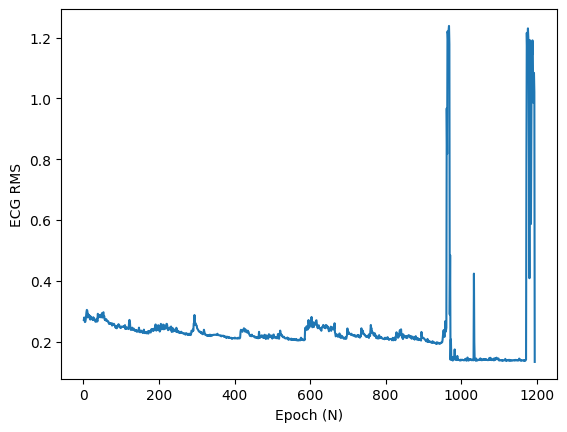

In [56]:
import matplotlib.pyplot as plt
plt.plot( d[ 'E' ] , d[ 'RMS' ] )
plt.xlabel('Epoch (N)')
plt.ylabel('ECG RMS')
plt.show()

We can also extract the sleep stage labels, which align with the above-defined epochs, using the convenience `stages()` command:

In [57]:
stages = p.stages()
len( stages )

1195

Following the tutorial, we'll only plot epochs 1 to 950 in order to exclude the outliers at the end of the study (during wake / after recording stopped).  We'll use the stage labels to color the values for each epoch (W,R,N = green, red, blues):

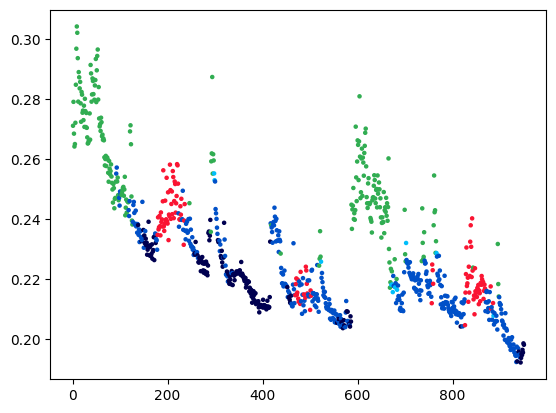

In [58]:
d[ 'SS' ] = stages[ 'STAGE' ]
d = d.loc[ d['E'] <= 950 , ] 
plt.scatter(d['E'], d['RMS'], c = lp.stgcol( d[ 'SS' ] ) , s=5 )
plt.show()

## Hypnograms

Next, we extract hypnogram-based statistics using the `HYPNO` command, here running for all individuals:

In [59]:
res = proj.proc( 'HYPNO epoch' )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG2 | ECG | EMG | EOG_L | EOG_R | EEG1
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OXSTAT
 ..................................................................
 CMD #1: HYPNO
   options: epoch sig=*
  set epochs to default 30 seconds, 1364 epochs
  set 0 leading/trailing sleep epochs to '?' (given end-wake=120 and end-sleep=5)
___________________________________________________________________
Processing: learn-nsrr02 | tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG2 | ECG | EMG | EOG_L | EOG_R | EEG1
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OXSTAT
 ..................................

Here we extract the stage durations for each individual (note: this includes some pre-defined stage labels including `N4` which can be ignored here):

In [60]:
t = proj.table( 'HYPNO' , 'SS' )
pd.pivot( t , index = 'ID' , columns = 'SS' , values='MINS' )

SS,?,L,N1,N2,N3,N4,NR,R,S,W,WASO
ID,,,,,,,,,,,
learn-nsrr01,0.0,0.0,54.5,261.5,8.5,0.0,324.5,119.0,443.5,238.5,67.0
learn-nsrr02,0.0,0.0,5.5,199.5,92.5,0.0,297.5,60.0,357.5,240.0,72.5
learn-nsrr03,0.0,0.0,26.0,187.5,10.5,0.0,224.0,0.0,224.0,458.0,175.5


Next we extract some cycle-based statistics:

In [61]:
t = proj.table( 'HYPNO' , 'C' )
t = t.astype( {"C": int } )   # makes the table format nicer
pd.pivot( t , index = 'ID' , columns = 'C' , values=[ 'NREMC_START','NREMC_MINS'] )

NREMC_START                          NREMC_MINS                \
C                      1    2    3    4    5    6          1      2      3   
ID                                                                           
learn-nsrr01          87  184  451  654  819  956       45.0  100.5   47.0   
learn-nsrr02          92  237  503  675  887  NaN       72.5  133.0   42.0   
learn-nsrr03         118  312  630  NaN  NaN  NaN       69.0   74.0  137.5   

                                 
C                 4     5     6  
ID                               
learn-nsrr01   77.5  60.0  50.0  
learn-nsrr02  105.5  32.5   NaN  
learn-nsrr03    NaN   NaN   NaN

Finally, we get extract epoch-level statistics, for just for one individual.  All these metrics are described in detail in the [main Luna pages](https://zzz.bwh.harvard.edu/luna/ref/hypnograms/).

In [62]:
t = proj.table( 'HYPNO', 'E' )
t.loc[ t['ID'] == 'learn-nsrr01' , ['E','STAGE','FLANKING','CLOCK_TIME'] ]

,E,STAGE,FLANKING,CLOCK_TIME
0,1,W,0,21:58:17
3,2,W,1,21:58:47
6,3,W,2,21:59:17
9,4,W,3,21:59:47
12,5,W,4,22:00:17
...,...,...,...,...
3913,1360,W,4,09:17:47
3915,1361,W,3,09:18:17
3917,1362,W,2,09:18:47
3919,1363,W,1,09:19:17


## Epoch-level masks

To illustrate applying different epoch-level masks, consider the following (somewhat unrealistic) example - to select epochs that:

   * occur between 11pm and 3am
   * are in persistent sleep as defined above (i.e. at least 10 minutes of sleep prior)
   * are during stage 2 NREM sleep
   * do not contain any apnea or hypopnea events

The following Luna command script (`cmd/third.txt`) shows one way of doing this, leveraging the ability of `HYPNO` to add annotations on-the-fly (to define persistent sleep):

In [63]:
lp.cmdfile( 'tutorial/cmd/third.txt' )

'HYPNO annot & MASK none & MASK hms=23:00:00-03:00:00 & MASK mask-ifnot=h_persistent_sleep & MASK mask-ifnot=N2 & MASK mask-if=Obstructive_Apnea,Hypopnea & DUMP-MASK'

We'll run this only for the first individual, as in the original tutorial:

In [64]:
p = proj.inst(1)
p.eval( lp.cmdfile( 'tutorial/cmd/third.txt' ) )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG2 | ECG | EMG | EOG_L | EOG_R | EEG1
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OXSTAT
 ..................................................................
 CMD #1: HYPNO
   options: annot sig=*
  set epochs to default 30 seconds, 1364 epochs
  set 0 leading/trailing sleep epochs to '?' (given end-wake=120 and end-sleep=5)
  creating hypnogram-derived annotations, with prefix h
 ..................................................................
 CMD #2: MASK
   options: none sig=*
  set masking mode to 'mask' (default)
  reset all 1364 epochs to be included
 ..................................................................
 CMD #3: MASK
   options: hms=23:00:00-03:00:00 sig=*
  set masking mode to 'mask' (default)

,Command,Strata
0,DUMP_MASK,E
1,HYPNO,BL
2,HYPNO,C
3,HYPNO,E
4,HYPNO,N
5,HYPNO,POST_PRE
6,HYPNO,SS
7,MASK,EMASK


Following the logic described in the [original tutorial](https://zzz.bwh.harvard.edu/luna/tut/tut3/#epoch-level-masks), we end up with 86 epochs following these steps.  The output of `MASK` above shows this to be the case here too. We can also pull this out explicitly - this shows all the mask steps, but from the script we know the final one if based on the apnea/hypopnea definitions - we see `N_RETAINED` equals 86:

In [65]:
p.table( 'MASK', 'EMASK' )

,ID,EMASK,MASK_MODE,MATCH_LOGIC,MATCH_TYPE,N_MASK_SET,N_MASK_UNSET,N_MATCHES,N_RETAINED,N_TOTAL,N_UNCHANGED
0,learn-nsrr01,"Hypopnea,Obstructive_Apnea",mask,OR,if,149,0,558,86,1364,1215
1,learn-nsrr01,N2,mask,OR,ifnot,37,0,523,235,1364,1327
2,learn-nsrr01,h_persistent_sleep,mask,OR,ifnot,209,0,644,272,1364,1155


## Manipulating EDFs

Here we give an overview of filtering, resampling, relabelling, re-referencing and re-writing signal data. Specifically, we want to:

   * set EEG units to millivolts
   * resample both EEGs to 100 Hz
   * bandpass filter the signals between 0.3 and 35 Hz
   * re-reference EEG2 to EEG1 (i.e. EEG2 = EEG2 - EEG1)
   * write only the EEGs as a new EDF in the folder `newedfs/`

The following command script (`cmd/fourth.txt`) illustrates the above features: 

In [66]:
%%sh
cat tutorial/cmd/fourth.txt

mV
RESAMPLE sr=100
FILTER bandpass=0.3,35 ripple=0.02 tw=1 fft
REFERENCE ref=EEG1 sig=EEG2
WRITE edf-tag=v2 edf-dir=newedfs/ sample-list=new.lst


The original Luna script pulls out only the two EEGs, using this innovocation:

Here, we'll make sure the `sig` variable is set such that only the EEGs are read in.  We'll start by setting it to be blank, and then use the alias terms `EEG1` and `EEG2` (see below):

In [67]:
proj.vars('sig','')
proj.vars('sig','EEG1,EEG2')
proj.vars('sig')

'EEG1,EEG2'

We'll also read the options defined in the parmeter file `vars.txt`, which include setting aliases for the two EEGs (to `EEG1` and `EEG2`):

In [68]:
proj.include( 'tutorial/cmd/vars.txt' )

  setting alias = EEG1|EEG
  setting alias = EEG2|EEG(sec)
  setting alias = OXSTAT|"OX STAT"
  setting eeg = EEG1,EEG2
  setting myepoch = 10
  setting nrem = N1,N2,N3


6

This means that we can use `EEG1` and `EEG2` in subsequent scripts; also, all outputs will be generated using these labels rather than the originals.  Note that although the EDFs do not contain labels `EEG1` or `EEG2` these were previously set as _aliases_ (via the included `vars.txt` file) and so we can use them here.  This is convenient when you have a many-to-one mapping of actually labels and the preferred term (as often happens across and within NSRR datasets, for example).  

To see what the current alias mapping table looks like (i.e. that will be applied when first attaching a study), we can use `proj.aliases()`.  Note that this may include a number of predefined aliases (typically different sleep stage naming conventions) alongside any user-defined ones:

In [69]:
proj.aliases()

,Type,Preferred,"Case-insensitive, sanitized alias"
1,CH,EEG1,EEG
2,CH,EEG2,EEG_SEC
3,CH,OXSTAT,OX_STAT
4,ANNOT,L,LIGHT
5,ANNOT,L,LIGHTS
6,ANNOT,lights_off,LIGHTSOFF
7,ANNOT,lights_on,LIGHTSON
8,ANNOT,lights_off,LIGHTS_OFF
9,ANNOT,lights_on,LIGHTS_ON
10,ANNOT,M,MOVEMENT|6


We can now run the script to generate the new EDFs:

In [70]:
res = proj.proc( lp.cmdfile( 'tutorial/cmd/fourth.txt' ) )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 2 (of 14) selected in a standard EDF file
  EEG2 | EEG1
 ..................................................................
 CMD #1: mV
   options: sig=*
  rescaled EEG2 to mV
  rescaled EEG1 to mV
 ..................................................................
 CMD #2: RESAMPLE
   options: sig=* sr=100
  resampling channel EEG2 from sample rate 125 to 100
  resampling channel EEG1 from sample rate 125 to 100
 ..................................................................
 CMD #3: FILTER
   options: bandpass=0.3,35 fft ripple=0.02 sig=* tw=1
  filtering channel(s): EEG2 EEG1
 ..................................................................
 CMD #4: REFERENCE
   options: ref=EEG1 sig=EEG2
  referencing EEG2 with respect to EEG1
 .............................................

This also generates a new sample list `new.lst` (appending the new files on the end, if it already existed).  We can attach that and see the details of the newly-generated EDFs:

In [71]:
proj.sample_list( 'new.lst' )

read 3 individuals from new.lst


In [72]:
proj.sample_list()

,ID,EDF,Annotations
1,learn-nsrr01,newedfs/learn-nsrr01-v2.edf,{}
2,learn-nsrr02,newedfs/learn-nsrr02-v2.edf,{}
3,learn-nsrr03,newedfs/learn-nsrr03-v2.edf,{}


In [73]:
proj.desc()

,ID,Gapped,Date,Start(hms),Stop(hms),Dur(hms),Dur(s),# sigs,# annots,Signals
1,learn-nsrr01,N,01.01.85,21.58.17,09.20.17,11:22:00,40920,2/2,0,EEG2[100] EEG1[100]
2,learn-nsrr02,N,01.01.85,21.18.06,07.15.36,09:57:30,35850,2/2,0,EEG2[100] EEG1[100]
3,learn-nsrr03,N,01.01.85,20.15.00,07.37.00,11:22:00,40920,2/2,0,EEG2[100] EEG1[100]


As shown above, this has generated three new EDFs in the `newedfs` folder.  Note that they have the preferred alias labels swapped in too.

## Artifact detection

Here we run a very simple artifact detection pipeline, appropriate for typical limited-montage sleep-EEG studies.  

To see a more advance EEG pipeline, see [this vignette](https://zzz.bwh.harvard.edu/luna/vignettes/chep/).

As we made some project-level changes above, first we'll reset a few key project-level variables to make sure we're starting from fresh, i.e. including reattaching the original sample-list, and specifying that we'll only consider the first EEG (`EEG` or equivalently `EEG1`):

In [74]:
proj.reset()
proj.sample_list( 'tutorial/s.lst' )
proj.var( 'sig', '.' )
proj.var( 'sig' , 'EEG' )

read 3 individuals from tutorial/s.lst


This script is contained in `fifth.txt`:

In [75]:
%%sh
cat tutorial/cmd/fifth.txt

EPOCH 
MASK if=W
RESTRUCTURE
FILTER bandpass=0.3,35 ripple=0.02 tw=1 fft
SIGSTATS epoch


Here we'll run just for the first individual:

In [76]:
p = proj.inst( 1 )
p.eval( lp.cmdfile( 'tutorial/cmd/fifth.txt' ) )

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 1 (of 14) selected in a standard EDF file
  EEG1
 ..................................................................
 CMD #1: EPOCH
   options: sig=*
  set epochs, length 30 (step 30, offset 0), 1364 epochs
 ..................................................................
 CMD #2: MASK
   options: if=W sig=*
  set masking mode to 'force'
  annots: W
  applied annotation mask for 1 annotation(s)
  477 epochs match; 477 newly masked, 0 unmasked, 887 unchanged
  total of 887 of 1364 retained
 ..................................................................
 CMD #3: RESTRUCTURE
   options: sig=*
  restructuring as an EDF+:  retaining 26610 of 40920 records
  of 682 minutes, dropping 238.5, retaining 443.5
  resetting mask
  clearing any cached values and recording options
  retainin

,Command,Strata
0,EPOCH,BL
1,MASK,EMASK
2,RESTRUCTURE,BL
3,SIGSTATS,CH
4,SIGSTATS,CH_E


These are the mean Hjorth parameter values across all sleep epochs:

In [77]:
p.table( 'SIGSTATS', 'CH' )

,ID,CH,H1,H2,H3
0,learn-nsrr01,EEG1,78.383424,0.353618,0.831613


Now we'll add in additional commands to flag/remove epochs that are outliers, using `CHEP-MASK` and `CHEP` as described [here](https:/zzz.bwh.harvard.edu/luna/ref/artifacts/#chep-mask):

In [78]:
%%sh
cat tutorial/cmd/sixth.txt

EPOCH 
MASK if=W
RESTRUCTURE
FILTER bandpass=0.3,35 ripple=0.02 tw=1 fft
SIGSTATS epoch
ARTIFACTS mask
CHEP-MASK ep-th=3,3,3 epoch
CHEP epochs
DUMP-MASK




In [79]:
p.eval( lp.cmdfile( 'tutorial/cmd/sixth.txt' ) )

 ..................................................................
 CMD #1: EPOCH
   options: sig=*
  set epochs, length 30 (step 30, offset 0), 887 epochs
 ..................................................................
 CMD #2: MASK
   options: if=W sig=*
  set masking mode to 'force'
  annots: W
  applied annotation mask for 1 annotation(s)
  0 epochs match; 0 newly masked, 0 unmasked, 887 unchanged
  total of 887 of 887 retained
 ..................................................................
 CMD #3: RESTRUCTURE
   options: sig=*
 ..................................................................
 CMD #4: FILTER
   options: bandpass=0.3,35 fft ripple=0.02 sig=* tw=1
  filtering channel(s): EEG1
  *** warning - running a command that pulls the whole trace
  ***           but currently an epoch mask set has been set;
  ***           for this operation to skip masked epochs,
  ***           you need to run RE (RESTRUCTURE) beforehand

 .........................................

,Command,Strata
0,ARTIFACTS,CH
1,DUMP_MASK,E
2,EPOCH,BL
3,MASK,EMASK
4,RESTRUCTURE,BL
5,SIGSTATS,CH
6,SIGSTATS,CH_E


   options: sig=*


To generate an equivalent plot as in the original tutorial, we'll pull out tables for the mask information (`tm`, was the epoch flagged as potential artifact or not) and epoch-level Hjorth parameters (`th`) and plot them:

In [80]:
tm = p.table( 'DUMP_MASK' , 'E' )
th = p.table( 'SIGSTATS' , 'CH_E' )

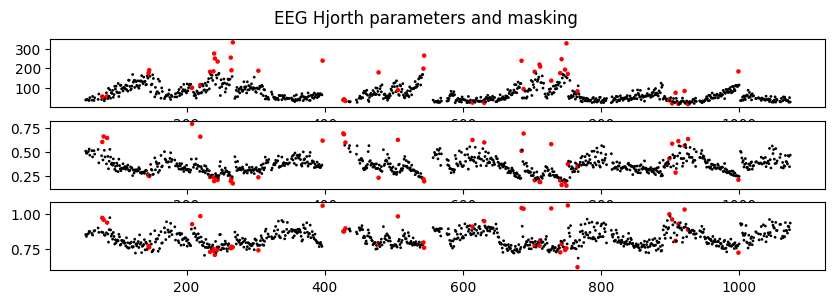

In [81]:
import numpy as np
cl = [ ['black','red'][e] for e in tm.EMASK ] 
sz = [ [1,5][e] for e in tm.EMASK ] 
fig, axs = plt.subplots(3, figsize=(10, 3) )
fig.suptitle('EEG Hjorth parameters and masking')
axs[0].scatter( th.E , th.H1 , s=sz, c = cl )
axs[1].scatter( th.E , th.H2 , s=sz, c = cl ) 
axs[2].scatter( th.E , th.H3 , s=sz, c = cl )
plt.show()

These plots are similar to those generated in the original tutorial.   We can also mirror the plotting of raw signal data, e.g. for epochs flagged as potentially bad (e.g. here epoch 220 in the original EDF, and 145 in the masked version):

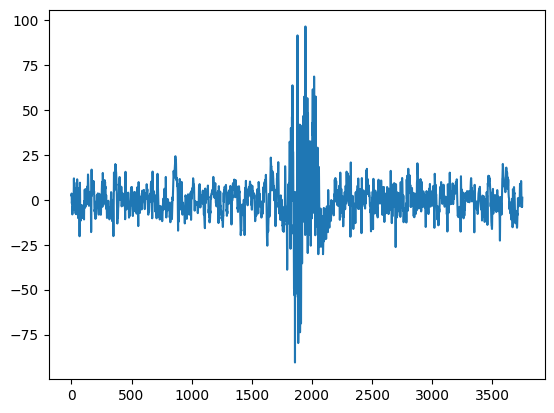

In [82]:
d = p.slice( p.e2i( 145 ) , chs = ['EEG' ] )
plt.plot( d[1] )
plt.show()

## Spectral & spindle analyses

Finally, we'll repeat some of the spectral and spindle analyses performed in the tutorial, from `seventh.txt`, running just for the first `EEG` channel.   This also shows how we can exclude epochs based on the type of epoch-level artifact detection methods above.

In [83]:
proj.var('sig','')
proj.var('sig','EEG')

In [84]:
%%sh
cat tutorial/cmd/seventh.txt

EPOCH 
MASK ifnot=N2
RESTRUCTURE
FILTER bandpass=0.3,35 ripple=0.02 tw=1 fft
ARTIFACTS mask
CHEP-MASK ep-th=3,3,3
CHEP epoch
RESTRUCTURE
PSD spectrum
SPINDLES fc=11,15 annot=spindles per-spindle
WRITE-ANNOTS file=spindles-^.txt annot=spindles


In [85]:
res = proj.proc( lp.cmdfile( 'tutorial/cmd/seventh.txt' ) ) 

___________________________________________________________________
Processing: learn-nsrr01 | tutorial/edfs/learn-nsrr01.edf
 duration 11.22.00, 40920s | time 21.58.17 - 09.20.17 | date 01.01.85

 signals: 1 (of 14) selected in a standard EDF file
  EEG1
 ..................................................................
 CMD #1: EPOCH
   options: sig=*
  set epochs, length 30 (step 30, offset 0), 1364 epochs
 ..................................................................
 CMD #2: MASK
   options: ifnot=N2 sig=*
  set masking mode to 'force'
  annots: N2
  applied annotation mask for 1 annotation(s)
  523 epochs match; 841 newly masked, 0 unmasked, 523 unchanged
  total of 523 of 1364 retained
 ..................................................................
 CMD #3: RESTRUCTURE
   options: sig=*
  restructuring as an EDF+:  retaining 15690 of 40920 records
  of 682 minutes, dropping 420.5, retaining 261.5
  resetting mask
  clearing any cached values and recording options
  ret

These are the output tables generated:

In [86]:
proj.strata()

,Command,Strata
0,ARTIFACTS,CH
1,EPOCH,BL
2,MASK,EMASK
3,PSD,B_CH
4,PSD,CH
5,PSD,CH_F
6,RESTRUCTURE,BL
7,SPINDLES,CH_F
8,SPINDLES,CH_F_SPINDLE


Here we pull out power spectra (metrics from `PSD` stratified by channel (`CH`) and frequency bin (`F`):

In [87]:
t = proj.table( 'PSD' , 'CH_F' ) 
t

,ID,CH,F,PSD,RELPSD
0,learn-nsrr01,EEG1,0.5,26.095467,0.069733
1,learn-nsrr02,EEG1,0.5,40.040815,0.05817
2,learn-nsrr03,EEG1,0.5,57.416516,0.112313
3,learn-nsrr01,EEG1,0.75,36.361816,0.097168
4,learn-nsrr02,EEG1,0.75,59.500991,0.086442
...,...,...,...,...,...
292,learn-nsrr02,EEG1,24.75,0.22352,0.000325
293,learn-nsrr03,EEG1,24.75,0.219892,0.00043
294,learn-nsrr01,EEG1,25.0,0.165338,0.000442
295,learn-nsrr02,EEG1,25.0,0.242015,0.000352


Plotting these, we see similar spectra as from the original tutorial:

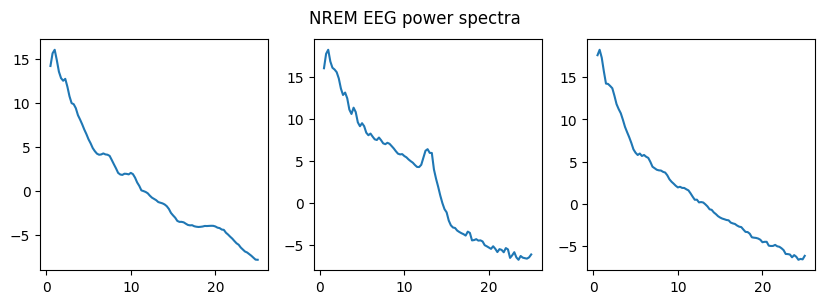

In [88]:
import numpy as np
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3) )
fig.suptitle('NREM EEG power spectra')
ax1.plot( t[ t.ID == 'learn-nsrr01' ].F, 10*np.log10( t[ t.ID == 'learn-nsrr01' ].PSD.astype(float) ) )
ax2.plot( t[ t.ID == 'learn-nsrr02' ].F, 10*np.log10( t[ t.ID == 'learn-nsrr02' ].PSD.astype(float) ) )
ax3.plot( t[ t.ID == 'learn-nsrr03' ].F, 10*np.log10( t[ t.ID == 'learn-nsrr03' ].PSD.astype(float) ) )
plt.show()

Following the tutorial, we can repeat without any filtering to see the impact on the PSD: (here we'll include the second EEG channel also).  Note, as we use the results of the above run (in `res`) below, we'll save these output to a dummy object `xxx`.  Note that that internal cache from the above run will be over-written when running this. 

In [89]:
proj.var( 'sig', 'EEG2' )
xxx = proj.silent_proc( ' EPOCH & MASK if=W & PSD spectrum max=62 ' )

In [90]:
display( proj.strata() )
t = proj.table( 'PSD' , 'CH_F' ) 

,Command,Strata
0,EPOCH,BL
1,MASK,EMASK
2,PSD,B_CH
3,PSD,CH
4,PSD,CH_F


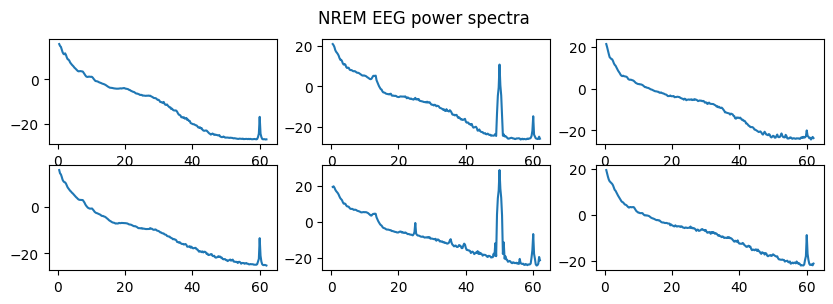

In [91]:
# plot all raw PSDs (rows = channels, cols = indivs)
fig, axs = plt.subplots(2, 3, figsize=(10, 3) )
fig.suptitle('NREM EEG power spectra')
chs = t.CH.unique()
ids = t.ID.unique()
t.PSD = t.PSD.astype(float)
for ch in list(range(0,2)):
    for id in list(range(0,3)):
        t1 = t[ ( t.ID == ids[id] ) & ( t.CH == chs[ch] ) ] 
        axs[ch][id].plot( t1.F, 10*np.log10( t1.PSD ) )


Finally, we can pull out the spindle results from the initial run (in `res`):

In [92]:
t = res['SPINDLES: CH_F']
t

,ID,CH,F,AMP,CHIRP,DENS,DISPERSION,DISPERSION_P,DUR,FFT,...,NE,NOSC,Q,SEC_AMP,SEC_P2P,SEC_TROUGH,SYMM,SYMM2,SYMM_AMP,SYMM_TROUGH
0,learn-nsrr01,EEG1,11.0,18.374559,-0.341215,0.730097,1.158478,0.473074,0.832681,10.794132,...,515.0,8.664894,0.621566,0.386392,0.370404,0.383397,0.454099,0.321446,0.474573,0.461875
1,learn-nsrr02,EEG1,11.0,30.032091,-0.429312,1.286076,1.13148,0.844281,0.848252,11.365996,...,395.0,9.257874,0.69147,0.413663,0.392299,0.398339,0.461707,0.325229,0.48344,0.46949
2,learn-nsrr03,EEG1,11.0,19.882662,-0.122014,0.724234,1.05621,0.786886,0.800923,10.869892,...,359.0,8.434615,0.676957,0.38806,0.3836,0.385018,0.480531,0.300928,0.492119,0.481131
3,learn-nsrr01,EEG1,15.0,13.377034,-0.271915,0.640777,1.166726,0.229235,0.691248,14.257812,...,515.0,9.448485,0.822881,0.335433,0.319273,0.316881,0.46286,0.294612,0.486689,0.458589
4,learn-nsrr02,EEG1,15.0,18.520831,-0.096829,2.055696,1.241304,0.002758,0.840118,13.416309,...,395.0,10.900246,0.943941,0.413543,0.386542,0.394384,0.464134,0.289703,0.495825,0.472815
5,learn-nsrr03,EEG1,15.0,16.944764,-0.064615,0.194986,0.96233,0.884971,0.711543,14.327567,...,359.0,9.714286,0.666951,0.390268,0.368914,0.37408,0.5241,0.286745,0.554958,0.531461


We extract spindle density (`DENS`) for individual for fast and slow spindles, getting values that match the original tutorial.

In [93]:
pd.pivot( t , index = 'ID' , columns = 'F' , values='DENS' )

F,11.0,15.0
ID,,
learn-nsrr01,0.730097,0.640777
learn-nsrr02,1.286076,2.055696
learn-nsrr03,0.724234,0.194986


This concludes this tutorial for now.